##  EDA

In [150]:
import pandas as pd
import numpy as np
# Find the full location of the file
acc_loc ="C:/Users/ZhitingDu/Documents/3-PM & Data Analytics Lab/measurements_ride_comfort/286/sensors_rawdata/sensor/ACCELEROMETER/acc_00000.csv"
gps_loc ="C:/Users/ZhitingDu/Documents/3-PM & Data Analytics Lab/measurements_ride_comfort/286/sensors_rawdata/sensor/POSITION/gps_00000.csv"


acc =  pd.read_csv(acc_loc, sep = ';')
gps =  pd.read_csv(gps_loc, sep = ';')

In [151]:
print(acc)

           timestamp  accelerationX  accelerationY  accelerationZ
0      1666815019038      -0.083797       0.380678       9.816526
1      1666815019078       0.021548       0.361524       9.919477
2      1666815019249      -0.129287       0.438139       9.850045
3      1666815019259      -0.126893       0.363919       9.759066
4      1666815019269      -0.055067       0.392649       9.816526
...              ...            ...            ...            ...
67947  1666815699708       0.320823      -0.486023      10.731112
67948  1666815699718       1.575385      -0.057461      10.369587
67949  1666815699728       2.138022      -0.260968       9.440637
67950  1666815699738       0.902614      -0.545878       9.476549
67951  1666815699748       0.294487      -0.344765       9.261071

[67952 rows x 4 columns]


In [152]:
print(gps)

         timestamp   latitude  longitude  accuracyPos    altitude  \
0    1666803664021  47.070809  15.437012      218.692  395.799988   
1    1666803869097  47.070648  15.435370      699.999  395.799988   
2    1666804010142  47.070703  15.434971      699.999  395.799988   
3    1666815019212  47.067209  15.442223       43.255  398.199982   
4    1666815029004  47.067243  15.441784       26.127  398.199982   
..             ...        ...        ...          ...         ...   
676  1666815702000  47.050799  15.397022        3.420  404.600006   
677  1666815703000  47.050788  15.396831        3.900  404.600006   
678  1666815704000  47.050776  15.396643        3.900  404.600006   
679  1666815705000  47.050766  15.396457        3.900  404.600006   
680  1666815706000  47.050770  15.396291        4.411  404.600006   

     accuracyAlt      speed  accuracySpeed    bearing  accuracyBearing  
0     114.772350   0.166471           0.00   65.73636              0.0  
1     114.772350   0.0000

In [153]:
# inner join
join= pd.merge(gps,acc,on='timestamp')

# selext needed columns
join= join[["latitude", "longitude","accelerationX","accelerationY","accelerationZ"]]
join

,latitude,longitude,accelerationX,accelerationY,accelerationZ
0,47.067230,15.441844,0.138864,-0.392649,9.328109
1,47.066672,15.440655,-0.531513,-0.732626,9.967360
2,47.066529,15.438916,0.596156,0.284910,9.895535
3,47.066442,15.438253,0.217872,-0.201113,10.161291
4,47.066399,15.436866,-0.313640,0.270545,9.957784
...,...,...,...,...,...
65,47.053956,15.409099,-0.488417,-0.402226,10.103830
66,47.052856,15.405322,0.122104,-0.641646,9.572318
67,47.052497,15.404082,-0.184354,-0.691924,10.381557
68,47.051773,15.401483,-0.112527,-1.438915,8.624214


In [154]:
# add new KPI
join['KPI'] = (join.accelerationX ** 2 + join.accelerationY**2 + join.accelerationZ**2 )**(1/6)
print (join)

     latitude  longitude  accelerationX  accelerationY  accelerationZ  \
0   47.067230  15.441844       0.138864      -0.392649       9.328109   
1   47.066672  15.440655      -0.531513      -0.732626       9.967360   
2   47.066529  15.438916       0.596156       0.284910       9.895535   
3   47.066442  15.438253       0.217872      -0.201113      10.161291   
4   47.066399  15.436866      -0.313640       0.270545       9.957784   
..        ...        ...            ...            ...            ...   
65  47.053956  15.409099      -0.488417      -0.402226      10.103830   
66  47.052856  15.405322       0.122104      -0.641646       9.572318   
67  47.052497  15.404082      -0.184354      -0.691924      10.381557   
68  47.051773  15.401483      -0.112527      -1.438915       8.624214   
69  47.051356  15.400255       0.735020      -0.392649       9.469367   

         KPI  
0   2.105759  
1   2.155036  
2   2.148499  
3   2.166263  
4   2.152019  
..       ...  
65  2.163276  
66 

In [155]:
# dataset summary
summary = join.describe()

print(summary)

        latitude  longitude  accelerationX  accelerationY  accelerationZ  \
count  70.000000  70.000000      70.000000      70.000000      70.000000   
mean   47.061154  15.422556      -0.015323      -0.254298       9.865984   
std     0.004800   0.008763       0.536143       0.839646       0.705582   
min    47.051356  15.400255      -1.599327      -2.286462       7.640197   
25%    47.056488  15.417029      -0.283713      -0.684143       9.786000   
50%    47.061477  15.422227      -0.105345      -0.202310       9.865607   
75%    47.066397  15.426489       0.202310       0.147842      10.044574   
max    47.067230  15.441844       1.766921       1.829170      12.447754   

             KPI  
count  70.000000  
mean    2.147346  
std     0.051610  
min     1.971451  
25%     2.140282  
50%     2.146781  
75%     2.162718  
max     2.318128  


## Visualisation

In [156]:
import folium


map_center = [join['latitude'].mean(), join['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=15)

# Add markers for each latitude, longitude point
for lat, lon in zip(join['latitude'], join['longitude']):
    folium.Marker(location=[lat, lon]).add_to(m)
    
  
m
m.save('map.html')
m

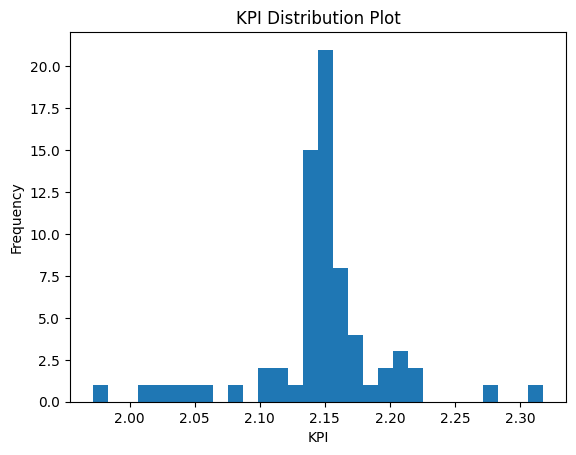

In [157]:
import matplotlib.pyplot as plt


# Plot the distribution
plt.hist(join.KPI, bins=30) # You can adjust the number of bins
plt.title('KPI Distribution Plot')
plt.xlabel('KPI')
plt.ylabel('Frequency')
plt.show()

In [158]:
def check_value(KPI):
    if join.kpi < 1:
        return 'Very good comfort'
    if 1<join.kpi < 2:
        return 'Good comfort'
    if 2<join.kpi < 4:
        return 'Moderate comfort'
    if 4<join.kpi < 5:
        return 'poor comfort'
    else:
        return 'Very poor comfort'



In [159]:
# Apply the function to the 'Value' column and create a new column 'Condition'
join['Condition'] = join['KPI'].apply(check_value)
print(join)

AttributeError: 'DataFrame' object has no attribute 'kpi'

In [ ]:


# Create a base map
m = folium.Map(location=[join['latitude'].mean(), join['longitude'].mean()], zoom_start=3)


# Define color mapping (you can customize this based on your categories)
color_mapping = {'A': 'blue', 'B': 'red'}

# Add points to the map with different colors
for i, row in join.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5,
        color=color_mapping[row['KPI']],
        fill=True,
        fill_color=color_mapping[row['KPI']],
        fill_opacity=0.6
    ).add_to(m)


KeyError: 2.1057590884539565